# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
from pprint import pprint
import os
from citipy import citipy
# Import API key
from api_keys import g_key
from api_keys import api_key
# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1300) 
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1300)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


567

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{url}appid={api_key}&units={units}&q="
response = requests.get(query_url + "london")
data = response.json()
pprint(data)

{'base': 'stations',
 'clouds': {'all': 96},
 'cod': 200,
 'coord': {'lat': 51.51, 'lon': -0.13},
 'dt': 1599174746,
 'id': 2643743,
 'main': {'feels_like': 52.81,
          'humidity': 72,
          'pressure': 1019,
          'temp': 60.22,
          'temp_max': 62.6,
          'temp_min': 57.99},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 1414,
         'sunrise': 1599196716,
         'sunset': 1599244843,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 250, 'speed': 13.87}}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

temp= []
max_temp = []
humidity = []
wind_speed = []
clouds = []
city_lat = []
city_lon = []
country = []
thedate = []
i = 0
for city in cities:  
    try:
        response = requests.get(query_url + city).json()
        temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
        city_lat.append(response['coord']['lat'])
        city_lon.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        thedate.append(response['dt'])
        
        print(f"The city of {city} has a temp of {temp[i]} F. Importing {i+1} of {len(cities)}")
        i = i + 1
    except KeyError:
        print(f"Key Error moving on...")
       


print(f"There were {len(cities) - i} exceptions out of {len(cities)}.")

 temp of 89.67 F. Importing 231 of 567
The city of acarau has a temp of 82.4 F. Importing 232 of 567
The city of vestmannaeyjar has a temp of 47.26 F. Importing 233 of 567
The city of talnakh has a temp of 41 F. Importing 234 of 567
The city of santa rosa has a temp of 82.71 F. Importing 235 of 567
The city of nueva imperial has a temp of 42.87 F. Importing 236 of 567
The city of teguldet has a temp of 50.79 F. Importing 237 of 567
The city of nyurba has a temp of 48.24 F. Importing 238 of 567
The city of kruisfontein has a temp of 54 F. Importing 239 of 567
The city of martapura has a temp of 72.93 F. Importing 240 of 567
The city of san cristobal has a temp of 86 F. Importing 241 of 567
The city of montale has a temp of 61.65 F. Importing 242 of 567
The city of pedasi has a temp of 80.08 F. Importing 243 of 567
The city of gravdal has a temp of 56.48 F. Importing 244 of 567
The city of georgetown has a temp of 76.91 F. Importing 245 of 567
Key Error moving on...
The city of ballina h

In [169]:

#columns = ['city', 'lat', 'lon', 'max temp', 'humidity', 'clouds', 'wind speed', 'country', 'date']
lists = [cities,city_lat,city_lon,max_temp,humidity,clouds,wind_speed,country,thedate]
merged_df = pd.concat([pd.Series(x) for x in lists], axis=1,)
#merged_df = merged_df.rename(columns={'0':'city', '1':'lat','2': 'lon','3': 'max temp','4': 'humidity','5': 'clouds','6': 'wind speed','7': 'country','8': 'date'})
merged_df.columns = ['city', 'lat', 'lon', 'max temp', 'humidity', 'clouds', 'wind speed', 'country', 'date']
merged_df = merged_df.dropna(axis=0)
merged_df

,city,lat,lon,max temp,humidity,clouds,wind speed,country,date
0,kapaa,22.08,-159.32,78.80,78.0,75.0,11.41,US,1970-01-01
1,cape town,-33.93,18.42,60.01,93.0,90.0,18.34,ZA,1970-01-01
2,rikitea,-23.12,-134.97,69.35,80.0,94.0,21.47,PF,1970-01-01
3,punta arenas,-53.15,-70.92,39.20,80.0,90.0,4.70,CL,1970-01-01
4,campbell river,50.02,-125.24,66.20,72.0,40.0,8.05,CA,1970-01-01
...,...,...,...,...,...,...,...,...,...
497,sur,-6.88,112.21,76.50,84.0,89.0,8.43,ID,1970-01-01
498,shimoda,49.76,129.52,58.05,92.0,98.0,3.22,RU,1970-01-01
499,aykhal,37.72,-25.43,77.00,65.0,20.0,12.75,PT,1970-01-01
500,killam,26.73,33.94,93.20,34.0,0.0,3.36,EG,1970-01-01


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [1]:


lists = [cities,city_lat,city_lon,max_temp,humidity,clouds,wind_speed,country,thedate]
merged_df = pd.concat([pd.Series(x) for x in lists], axis=1)
#merged_df = merged_df.rename(columns={'0':'city', '1':'lat','2': 'lon','3': 'max temp','4': 'humidity','5': 'clouds','6': 'wind speed','7': 'country','8': 'date'})
merged_df.columns = ['city', 'lat', 'lon', 'max temp', 'humidity', 'clouds', 'wind speed', 'country', 'date']
merged_df = merged_df.dropna(axis=0)
#merged_df
#merged_df['date'] = pd.to_datetime(merged_df['date'],unit='ms')
merged_df.to_csv(output_data_file)
merged_df.head()


NameError: name 'cities' is not defined

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [171]:
#  Get the indices of cities that have humidity over 100%.
humid_af = merged_df.loc[merged_df['humidity']>100]
humid_af
#no city has humidity over 100 


,city,lat,lon,max temp,humidity,clouds,wind speed,country,date


In [204]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = 'cities.csv'
data = pd.read_csv(clean_city_data) 
data = data.drop(['Unnamed: 0'], axis=1)
data.head()


,city,lat,lon,max temp,humidity,clouds,wind speed,country,date
0,kapaa,22.08,-159.32,78.80,78.0,75.0,11.41,US,1970-01-01
1,cape town,-33.93,18.42,60.01,93.0,90.0,18.34,ZA,1970-01-01
2,rikitea,-23.12,-134.97,69.35,80.0,94.0,21.47,PF,1970-01-01
3,punta arenas,-53.15,-70.92,39.20,80.0,90.0,4.70,CL,1970-01-01
4,campbell river,50.02,-125.24,66.20,72.0,40.0,8.05,CA,1970-01-01
...,...,...,...,...,...,...,...,...,...
497,sur,-6.88,112.21,76.50,84.0,89.0,8.43,ID,1970-01-01
498,shimoda,49.76,129.52,58.05,92.0,98.0,3.22,RU,1970-01-01
499,aykhal,37.72,-25.43,77.00,65.0,20.0,12.75,PT,1970-01-01
500,killam,26.73,33.94,93.20,34.0,0.0,3.36,EG,1970-01-01


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

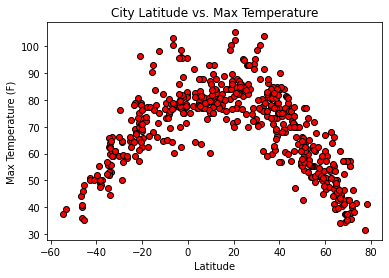

In [187]:
x_axis = data['lat']
y_axis = data['max temp']

plt.title("City Latitude vs. Max Temperature")
plt.ylabel('Max Temperature (F)')
plt.xlabel("Latitude")
#plt.xlim() placeholder but I like the way it looks without setting values 
#plt.ylim() will leave this and comments 
plt.scatter(x_axis, y_axis, marker='o', edgecolors='black', facecolors = 'red')
plt.plot()
plt.savefig("lat-vs-temp.png",dpi=150)
plt.show()

## Latitude vs. Humidity Plot

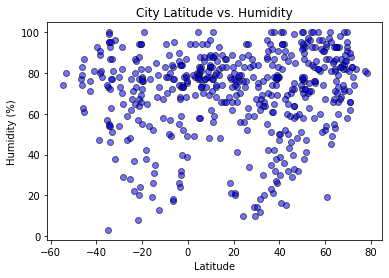

In [188]:
x_axis = data['lat']
y_axis = data['humidity']
plt.title('City Latitude vs. Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.scatter(x_axis, y_axis, marker='o', edgecolors='black', facecolors = 'blue',alpha=0.55)
plt.savefig("lat-vs-humidity.png",dpi=150)
plt.show()

## Latitude vs. Cloudiness Plot

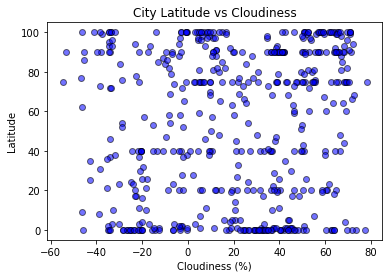

In [189]:
x_axis = data['lat']
y_axis = data['clouds']
plt.title('City Latitude vs Cloudiness')
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.scatter(x_axis, y_axis, marker='o', edgecolors='black', facecolors = 'blue',alpha=0.55)
plt.savefig("lat-vs-cloudiness.png",dpi=150)
plt.show()

## Latitude vs. Wind Speed Plot

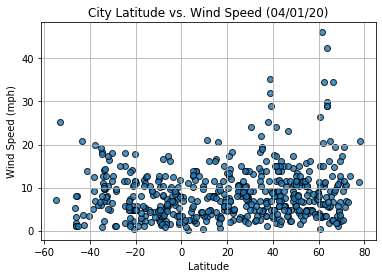

In [13]:
y_axis = data["Lat"]
x_axis = data["wind speed"]


plt.title("Latitude vs Wind Speed")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed")

plt.scatter(x_axis, y_axis, marker='o', edgecolors='black', facecolors = 'blue',alpha=0.55))
plt.savefig("lat-vs-windspeed.png",dpi=150)
plt.show()

## Linear Regression

In [193]:
northern = data.loc[data['lat']>=0]
southern = data.loc[data['lat']<0]
#northern 350 cities 
#southern 152 cities 

,city,lat,lon,max temp,humidity,clouds,wind speed,country,date
1,cape town,-33.93,18.42,60.01,93.0,90.0,18.34,ZA,1970-01-01
2,rikitea,-23.12,-134.97,69.35,80.0,94.0,21.47,PF,1970-01-01
3,punta arenas,-53.15,-70.92,39.20,80.0,90.0,4.70,CL,1970-01-01
5,carnarvon,-24.87,113.63,62.60,77.0,0.0,11.41,AU,1970-01-01
9,caravelas,-17.71,-39.25,77.45,65.0,26.0,9.62,BR,1970-01-01
...,...,...,...,...,...,...,...,...,...
473,ruatoria,-31.95,141.43,60.80,38.0,38.0,4.70,AU,1970-01-01
486,kidal,-6.29,145.87,60.08,95.0,74.0,1.88,PG,1970-01-01
488,sola,-14.78,24.80,76.42,31.0,1.0,6.35,ZM,1970-01-01
492,ponta do sol,-7.84,-79.15,69.71,57.0,69.0,11.43,PE,1970-01-01


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


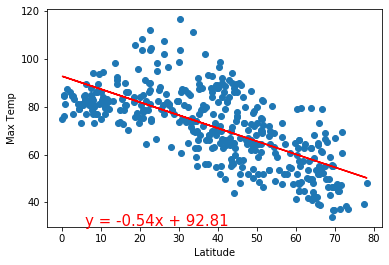

In [25]:
x_axis = northern['lat']
y_axis = northern['max temp']
plt.xlabel('Max Temp')
plt.ylabel('Latitude')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


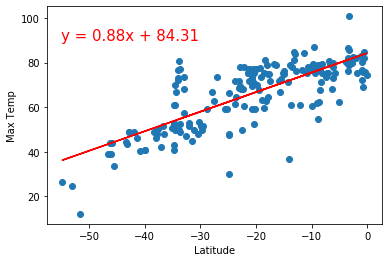

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


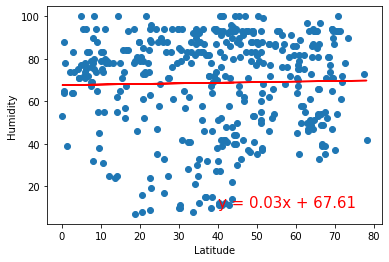

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


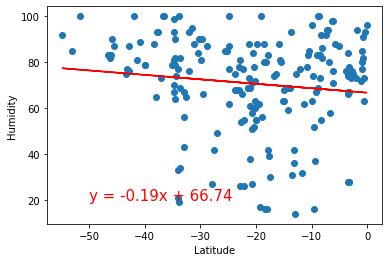

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


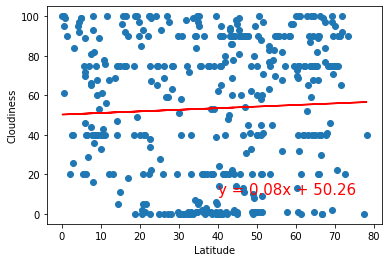

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


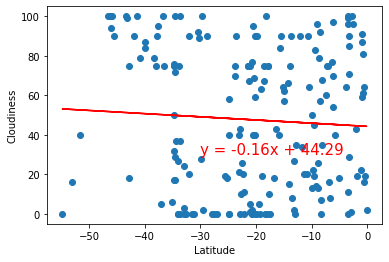

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


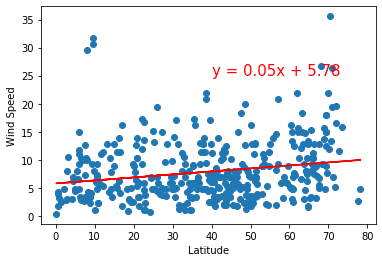

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


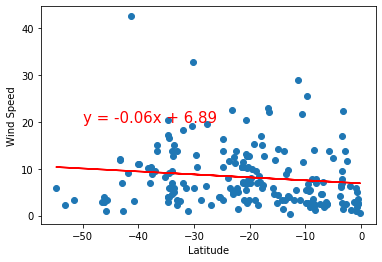